In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px 



# Part 1 of Data Science Assessment

#### 1. Read in the gapminder_clean.csv data as a pandas DataFrame.

In [3]:
df = pd.read_csv('gapminder_clean.csv')

#### 2. Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap for the filtered data.

Text(0.5, 1.0, 'Scatter Plot of GDP per Capita vs CO2 emissions')

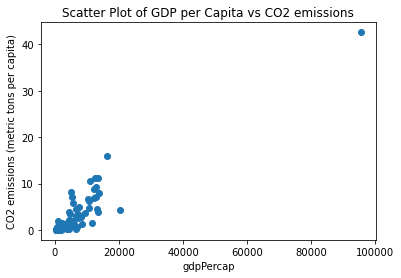

In [4]:
df2 = df.loc[df['Year'] == 1962]

df2_int = df2[['CO2 emissions (metric tons per capita)', 'gdpPercap']].dropna()

plt.scatter(df2_int['gdpPercap'], df2_int['CO2 emissions (metric tons per capita)'], norm = True)
plt.xlabel('gdpPercap')   
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.title('Scatter Plot of GDP per Capita vs CO2 emissions')

#### 3. On the filtered data, calculate the correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap. What is the correlation and associated p value?

In [5]:
r = stats.pearsonr(df2_int['gdpPercap'], df2_int['CO2 emissions (metric tons per capita)'])

print('Correlation Coeffecient (R): ', r[0])
print('P-Value: ', r[1])

Correlation Coeffecient (R):  0.926081672501947
P-Value:  1.1286792210040484e-46


#### 4. On the unfiltered data, answer "In what year is the correlation between 'CO2 emissions (metric tons per capita)' and gdpPercap the strongest?" Filter the dataset to that year for the next step...

In [6]:
corr_yr =  df.groupby('Year')[['gdpPercap', 'CO2 emissions (metric tons per capita)']].corr().unstack(level=1)
corr_yr = corr_yr['CO2 emissions (metric tons per capita)', 'gdpPercap']
strongest_corr = corr_yr.idxmax()
print('The year with the strongest correlation between CO2 emissions and GDP per capita is ' + str(strongest_corr) + '.')


The year with the strongest correlation between CO2 emissions and GDP per capita is 1967.


#### 5. Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap, where the point size is determined by pop (population) and the color is determined by the continent.

In [7]:
df3 = df[['Year', 'CO2 emissions (metric tons per capita)', 'gdpPercap', 'continent', 'Population density (people per sq. km of land area)']]
fil_df3 = df3.loc[df3['Year'] == 1967].dropna()

fig = px.scatter(fil_df3, x='gdpPercap', y='CO2 emissions (metric tons per capita)', title='Interactive Scatter Plot of GDP per Capita vs CO2 emissions', color='continent', size='Population density (people per sq. km of land area)')

fig.show()


# Part 2 of Data Science Assessment

#### 1. What is the relationship between continent and Energy use (kg of oil equivalent per capita)?

In this scenario, an ANOVA (specifically a one-way) to identify what the relationship is between the catergorical [independent] variable (i.e. Continents) and the qualitative [dependent] variable (i.e. Energy use). Because there are more than two continents being compared, the ANOVA must be used rather than a T-test. 

Null Hypothesis, H0 - there is no statistically significant difference between the Energy use (kg of oil equivalent per capita) of the five continents described in the data set.

Alternative Hypothesis, H1 - there is a statistically significant difference which indicates variance in the Energy use (kg of oil equivalent per capita) between the continents. 

α = 0.05

In [8]:
from scipy.stats import f_oneway

df4 = df[['continent', 'Energy use (kg of oil equivalent per capita)']].dropna()

cont_data = [group['Energy use (kg of oil equivalent per capita)'] for continent, group in df4.groupby('continent')] 

f_oneway(*cont_data)


F_onewayResult(statistic=51.45915759042634, pvalue=8.527003487154367e-39)

α = 0.05 >  pvalue=8.527003487154367e-39

The P-Value of 8.527e-39 is less that the chosen α value of 0.05, therefore there is sufficient statistical evidence to conclude that there is signifigant variation in Energy use (kg of oil equivalent per capita) amongst the five continents described in the dataset. 

This statement is well visualized when a bar chart is used to display the data in question. 

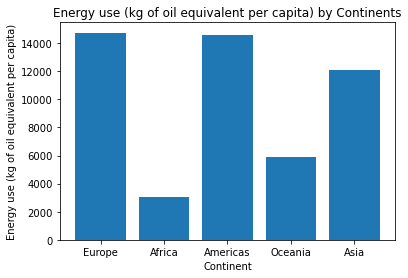

In [9]:
plt.bar(df4['continent'], df4['Energy use (kg of oil equivalent per capita)'])
plt.xlabel('Continent')
plt.ylabel('Energy use (kg of oil equivalent per capita)')
plt.title('Energy use (kg of oil equivalent per capita) by Continents')
plt.show()

#### 2. Is there a significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990?


H0 - there is no signifigant difference between the import of goods and services between Asia and Europe in years after 1990
H1 - there is a signifigant difference between the import of goods and services between Asia and Europe in years after 1990

I will go with the Mann-Whitney U test considering the distributions are not normal.

In [10]:
import seaborn as sns 

df5 = df[['Year', 'continent', 'Imports of goods and services (% of GDP)']]

fil_df5 = df5[(df5['Year'] > 1990) & ((df5['continent'] == 'Asia') | (df5['continent'] == 'Europe'))].dropna()

asiadf5 = fil_df5[fil_df5['continent'] == 'Asia'] 
eurodf5 = fil_df5[fil_df5['continent'] == 'Europe'] 


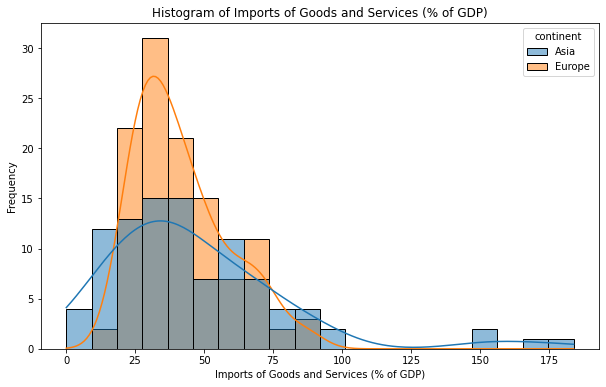

In [11]:
#visualizing distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=fil_df5, x='Imports of goods and services (% of GDP)', hue='continent', bins=20, kde=True )
plt.title('Histogram of Imports of Goods and Services (% of GDP)')
plt.xlabel('Imports of Goods and Services (% of GDP)')
plt.ylabel('Frequency')
plt.show()

The distribution is not normal 

In [12]:
from scipy.stats import kstest

#alpha = 0.05
kstest_asia = kstest(asiadf5['Imports of goods and services (% of GDP)'], 'norm') 
kstest_euro = kstest(eurodf5['Imports of goods and services (% of GDP)'], 'norm')
print(kstest_asia)
print(kstest_euro)
# k-test also asserts no normal distiribution 

stats.mannwhitneyu(asiadf5['Imports of goods and services (% of GDP)'], eurodf5['Imports of goods and services (% of GDP)'])

print('There is not a signifigant difference considering that p > alpha = 0.05')

KstestResult(statistic=0.9693877551020302, pvalue=8.293876044120096e-149)
KstestResult(statistic=1.0, pvalue=0.0)
There is not a signifigant difference considering that p > alpha = 0.05


#### 3. What is/are the country (or countries) that has the highest 'Population density (people per sq. km of land area)' across all years? (i.e., which country has the highest average ranking in this category across each time point in the dataset?)

I think the best method of answering this question is by examining each year in which data was collected and ranking the population density of the coutnries in the dataset. Then once I have done that, I will calculate the average rank of each of the countries and whichever country has the highest average rank will be determined as the answer to the question of "which country has the highest population density across all years".

In [13]:
df6 = df[['Country Name', 'Year', 'Population density (people per sq. km of land area)']]

#get unique values for years so I know how many dataframes to make
#df6['Year'].unique() = array([1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007])

#Creating individual dataframes for analysis 

#1962
df6_1962 = df6.loc[df6['Year'] == 1962].dropna()
df6_1962['Rank'] = df6_1962['Population density (people per sq. km of land area)'].rank(ascending = True)
df6_1962 = df6_1962.sort_values(by=['Population density (people per sq. km of land area)'], ascending = True)

#1967
df6_1967 = df6.loc[df6['Year'] == 1967].dropna()
df6_1967['Rank'] = df6_1967['Population density (people per sq. km of land area)'].rank(ascending = True)
df6_1967 = df6_1967.sort_values(by=['Population density (people per sq. km of land area)'], ascending = True)

#1972
df6_1972 = df6.loc[df6['Year'] == 1972].dropna()
df6_1972['Rank'] = df6_1972['Population density (people per sq. km of land area)'].rank(ascending = True)
df6_1972 = df6_1972.sort_values(by=['Population density (people per sq. km of land area)'], ascending = True)

#1977
df6_1977 = df6.loc[df6['Year'] == 1977].dropna()
df6_1977['Rank'] = df6_1977['Population density (people per sq. km of land area)'].rank(ascending = True)
df6_1977 = df6_1977.sort_values(by=['Population density (people per sq. km of land area)'], ascending = True)

#1982
df6_1982 = df6.loc[df6['Year'] == 1982].dropna()
df6_1982['Rank'] = df6_1982['Population density (people per sq. km of land area)'].rank(ascending = True)
df6_1982 = df6_1982.sort_values(by=['Population density (people per sq. km of land area)'], ascending = True)

#1987
df6_1987 = df6.loc[df6['Year'] == 1987].dropna()
df6_1987['Rank'] = df6_1987['Population density (people per sq. km of land area)'].rank(ascending = True)
df6_1987 = df6_1987.sort_values(by=['Population density (people per sq. km of land area)'], ascending = True)

#1992
df6_1992 = df6.loc[df6['Year'] == 1992].dropna()
df6_1992['Rank'] = df6_1992['Population density (people per sq. km of land area)'].rank(ascending = True)
df6_1992 = df6_1992.sort_values(by=['Population density (people per sq. km of land area)'], ascending = True)

#1997 
df6_1997 = df6.loc[df6['Year'] == 1997].dropna()
df6_1997['Rank'] = df6_1997['Population density (people per sq. km of land area)'].rank(ascending = True)
df6_1997 = df6_1997.sort_values(by=['Population density (people per sq. km of land area)'], ascending = True)

#2002
df6_2002 = df6.loc[df6['Year'] == 2002].dropna()
df6_2002['Rank'] = df6_2002['Population density (people per sq. km of land area)'].rank(ascending = True)
df6_2002 = df6_2002.sort_values(by=['Population density (people per sq. km of land area)'], ascending = True)

#2007
df6_2007 = df6.loc[df6['Year'] == 2007].dropna()
df6_2007['Rank'] = df6_2007['Population density (people per sq. km of land area)'].rank(ascending = True)
df6_2007 = df6_2007.sort_values(by=['Population density (people per sq. km of land area)'], ascending = True)




In [14]:
#where the magic happens [1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]


df6_list  = [df6_1962, df6_1967, df6_1972, df6_1977, df6_1982, df6_1987, df6_1992, df6_1997, df6_2002, df6_2007]

country_avg_ranks = {}

for datf in df6_list:
    country_name = datf['Country Name'].tolist()
    ranking = datf['Rank'].tolist()
    
    for country_name, ranking, in zip(country_name, ranking):
        if country_name not in country_avg_ranks:
            country_avg_ranks[country_name] = []
        country_avg_ranks[country_name].append(ranking)
        
for country, average_rank in country_avg_ranks.items():
    avg_rank = sum(average_rank) / len(average_rank)
    
highest_avg_rank_country = min(country_avg_ranks, key=country_avg_ranks.get)

# Print the country with the highest average ranking
print(f"The country with the highest average ranking is {highest_avg_rank_country}")

The country with the highest average ranking is Greenland


As seen in the data analysis, the country with the highest population density across all years is Greenland. 

#### 4. What country (or countries) has shown the greatest increase in 'Life expectancy at birth, total (years)' between 1962 and 2007?

Ok so first of course I will create a dataframe with the appropriate data.

My approach is to take the life expectancy of each country in 1962 and 2007, then subtract the life expectancies (i.e. life expectancy in 2007 - life expectancy in 1962) and then whichever country has the greatest difference in life expectancy from the two years is the country that has had the greatest increase in life expectancy from the years of 1962-2007. 

In [18]:
df7 = df[['Country Name', 'Year', 'Life expectancy at birth, total (years)']].dropna().query('Year == 1962 | Year == 2007')

country_lex_2007 = {}
country_lex_1962 = {}
differences = {}

for row in df7.iterrows():
    country = row[1]['Country Name']
    if row[1]['Year'] == 2007:
        country_lex_2007[country] = row[1]['Life expectancy at birth, total (years)']
    elif row[1]['Year'] == 1962:
        country_lex_1962[country] = row[1]['Life expectancy at birth, total (years)']
    

for country, lex_1962 in country_lex_1962.items():
    lex_2007 = country_lex_2007.get(country)
    if lex_2007:
        difference = lex_2007 - lex_1962
        differences[country] = difference 
        
greatest_increase = max(differences.items(), key = lambda x : x[1])
print('The country with the greatest increase in life expectancy from 1962 - 2007 was', greatest_increase[0], 'with an increase of', greatest_increase[1], 'years!')
    
  
        

The country with the greatest increase in life expectancy from 1962 - 2007 was Maldives with an increase of 36.916146341499996 years!
